In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
print("Setup Complete")

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv
Setup Complete


In [80]:
kidney_train = pd.read_csv("../input/playground-series-s3e12/train.csv")
kidney_test = pd.read_csv("../input/playground-series-s3e12/test.csv")
print(kidney_train.info(),kidney_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4),

In [81]:
kidney_train.head

<bound method NDFrame.head of       id  gravity    ph  osmo  cond  urea  calc  target
0      0    1.013  6.19   443  14.8   124  1.45       0
1      1    1.025  5.40   703  23.6   394  4.18       0
2      2    1.009  6.13   371  24.5   159  9.04       0
3      3    1.021  4.91   442  20.8   398  6.63       1
4      4    1.021  5.53   874  17.8   385  2.21       1
..   ...      ...   ...   ...   ...   ...   ...     ...
409  409    1.011  5.21   527  21.4    75  1.53       0
410  410    1.024  5.53   577  19.7   224  0.77       0
411  411    1.018  6.28   455  22.2   270  7.68       1
412  412    1.008  7.12   325  12.6    75  1.03       1
413  413    1.011  6.13   364   9.9   159  0.27       0

[414 rows x 8 columns]>

In [82]:
kidney_train.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

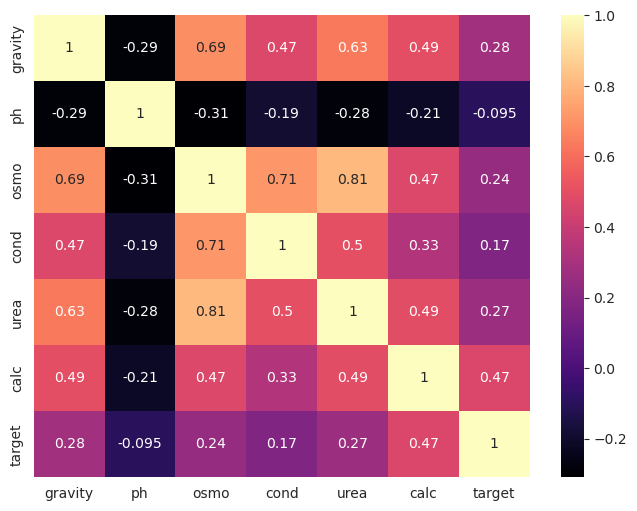

In [83]:
features = [i for i in kidney_train.columns if i!="id"]
corr = kidney_train[features].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = 'magma', annot = True);

In [84]:
kidney_train.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [85]:
for i in kidney_train.columns:
    print(i,(kidney_train[i]==0).sum())

id 1
gravity 0
ph 0
osmo 0
cond 0
urea 0
calc 0
target 230


In [86]:
X_train = kidney_train[['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
X_test = kidney_test[['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
y_train = kidney_train.target

In [87]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,random_state = True,test_size = 0.3)

seed = np.random.seed(0)

In [88]:
rfmodel = RandomForestClassifier(max_depth = 15,random_state=seed)
rfmodel.fit(X_train,y_train)
# print("MAE of RF:",mean_absolute_error(y_test, rfmodel.predict(X_test)))

RandomForestClassifier(max_depth=15)

In [89]:
hgbmodel = HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error')
hgbmodel.fit(X_train,y_train)
# print("MAE of RF:",mean_absolute_error(y_test, hgbmodel.predict(X_test)))

HistGradientBoostingRegressor(loss='absolute_error')

In [90]:
gbmodel = GradientBoostingRegressor(random_state = seed, loss = 'absolute_error',max_depth= 8)
gbmodel.fit(X_train,y_train)
# print("MAE of RF:",mean_absolute_error(y_test, gbmodel.predict(X_test)))

GradientBoostingRegressor(loss='absolute_error', max_depth=8)

In [97]:
rfpred = rfmodel.predict(X_test)
hgbpred = hgbmodel.predict(X_test)
gbpred = gbmodel.predict(X_test)

kidney_submission = kidney_test
kidney_submission["target"] = rfpred
# kidney_submission["target"] = hgbpred
# kidney_submission["target"] = gbpred

kidney_submission.columns

Index(['id', 'target'], dtype='object')

In [98]:
colsToDrop = [i for i in kidney_submission.columns if (i!="id" and i!="target")]

kidney_submission.drop(colsToDrop,axis = 1,inplace = True)

In [99]:
kidney_submission.to_csv('submission1.csv',header=True,index=False)